In [526]:
from wand.image import Image

import matplotlib.pyplot as plt
%matplotlib inline

import os

# Find and select images

In [527]:
FIGURESDIR = 'figures_extracted/'
THUMBNAILSDIR = 'thumbnails/'

allfigures = os.listdir(FIGURESDIR)
print( 'nombre total de figures : %i' % len(allfigures) )

nombre total de figures : 3361


In [528]:
figuresToResize = [ i for i in allfigures if i.endswith( 'fig0.png' ) ]
print( 'nombre de figures n°0 : %i' %len(figuresToResize))

nombre de figures n°0 : 376


# Resize


In [529]:
def newsize( maxsize, oldsize ):
    w, h = oldsize
    newW = int( min(maxsize, w*maxsize/h) )
    newH = int( min(maxsize, h*maxsize/w) )
    
    return newW, newH

def resize( imgname, finalsize=120 ):
    thumbnail_name = imgname.replace('fig0', 'thumbnail')
    
    with Image(filename = FIGURESDIR+imgname ) as img:

        with img.clone() as thumb:
            thumb.resize( *newsize( maxsize, img.size ), blur=1, filter='sinc' )
            thumb.contrast_stretch(black_point=0.012, white_point=1)

            thumb.format = 'png8'
            thumb.save( filename = THUMBNAILSDIR + thumbnail_name )

In [530]:
resize( imgname )

# Loop

In [531]:
for k, imgname in enumerate( figuresToResize ):
    
    resize( imgname )
    
    print(  '%i / %i' % (k+1, len(figuresToResize)) , end='\r' )
    

# debug

In [524]:
imgname = figuresToResize[28]

maxsize = 130

In [120]:
thumbnail_name = imgname.replace('fig0', 'thumbnail')
thumbnail_name

'US2890706-thumbnail.png'

In [121]:
def newsize( maxsize, oldsize ):
    w, h = oldsize
    newW = int( min(maxsize, w*maxsize/h) )
    newH = int( min(maxsize, h*maxsize/w) )
    
    return newW, newH

In [122]:
thumbnail_name = imgname.replace('fig0', 'thumbnail')

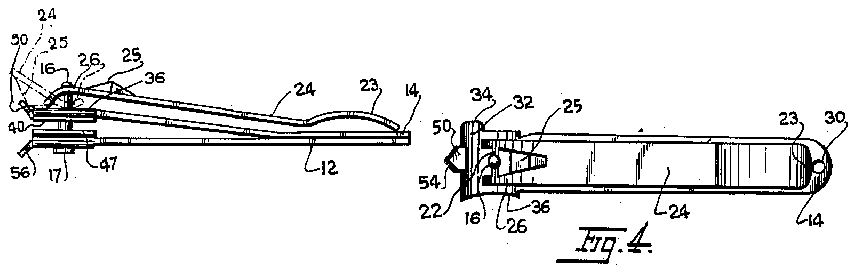

In [123]:
img = Image(filename = FIGURESDIR+imgname )
img

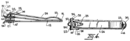

In [124]:
thumb = img.clone()
thumb.resize( *newsize( maxsize, img.size ), blur=1 )
thumb.format = 'png8'
thumb

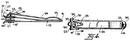

In [125]:
thumb = img.clone()
thumb.resize( *newsize( maxsize, img.size ), blur=1, filter='sinc' )
thumb.format = 'png8'
thumb

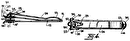

In [315]:
thumb = img.clone()
thumb.resize( *newsize( maxsize, img.size ), blur=1, filter='sinc' )
#thumb.format = 'png8'
thumb.contrast_stretch(black_point=0.012, white_point=1)
thumb


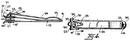

In [316]:
thumb = img.clone()
thumb.resize( *newsize( maxsize, img.size ), blur=1, filter='sinc' )
#thumb.format = 'png8'
thumb.contrast_stretch()
thumb

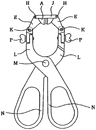

In [104]:
thumb = img.clone()
thumb.resize( *newsize( maxsize, img.size ), blur=1, filter='parzen' )
thumb.format = 'png8'
thumb

        sinc: good
        lanczossharp : yes
        cosine: yes
        
        lanczos2sharp : no but ggo
        mitchell: no
        quadratic: no
        cubic: no
        robidouxsharp : no
        jinc: no
        catrom, hermite: no
        point, box, triangle: no
        hanning : no
        hamming : no
        blackman: no
        gaussian: no
        kaiser, welsh: no
        parzen: no, but good
        bartlett : no
        sentinel : no

In [161]:
from wand.color import Color

http://docs.wand-py.org/en/stable/wand/image.html?highlight=mask

http://www.imagemagick.org/Usage/masking/#alpha_shape

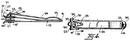

In [515]:
thumb = img.clone()
thumb.resize( *newsize( maxsize, img.size ), blur=1, filter='sinc' )
#thumb.format = 'png8'
#thumb.contrast_stretch()
thumb

In [516]:
thumb.alpha_channel = 'shape'

In [517]:
thumb.negate( channel='alpha', grayscale=True )

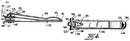

In [518]:
thumb

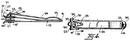

In [519]:
thumb.channel_images['alpha']

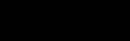

In [520]:
thumb.channel_images['gray']

In [502]:
thumb.type

'grayscalematte'

In [340]:
thumb.composite_channel(operator='copy', image=thumb.channel_images['gray'], channel='alpha')

In [329]:
thumb.type = 'truecolormatte'

In [330]:
thumb.background_color = Color( 'black' )
thumb.background_color

wand.color.Color('srgb(0,0,0)')

In [331]:
#thumb.negate()

In [332]:
thumb.alpha_channel = 'shape'

In [341]:
thumb.negate( channel='alpha' )

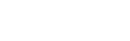

In [342]:
thumb

In [220]:
thumb.matte_color = Color( 'black' )

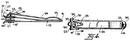

In [343]:
thumb = img.clone()
thumb.resize( *newsize( maxsize, img.size ), blur=1, filter='sinc' )
#thumb.format = 'png8'
thumb.contrast_stretch()
thumb

In [317]:
thumb.channel_images['alpha'].composthumb.composite_channel(operator='copy',
                            image=thumb.channel_images['gray'], channel='alpha')

TypeError: 'ChannelImageDict' object does not support item assignment

In [305]:
list( thumb.channel_images.keys() )

['red',
 'cyan',
 'gray_channels',
 'true_alpha',
 'black',
 'magenta',
 'rgb_channels',
 'composite_channels',
 'alpha',
 'yellow',
 'undefined',
 'index',
 'all_channels',
 'sync_channels',
 'gray',
 'green',
 'opacity',
 'default_channels',
 'blue']

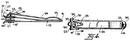

In [320]:
thumb.channel_images['red']

In [318]:
thumb.type = 'truecolor'